In [95]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import plotly

In [96]:
 np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [97]:
df=pd.read_csv(r"../data/attrition_data.csv")
df.drop(['TERMINATION_YEAR'], axis = 1, inplace=True)
df.drop(['EMP_ID'], axis = 1, inplace=True)
df=df.replace({'STATUS': {'T': 1, 'A': 0}})

In [98]:
x=df.drop(['STATUS'], axis=1)
y=df['STATUS']

In [99]:
x = pd.get_dummies(x, columns=['ETHNICITY', 'REFERRAL_SOURCE', 'SEX', 'MARITAL_STATUS', 'NUMBER_OF_TEAM_CHANGED', 'HIRE_MONTH', 'IS_FIRST_JOB', 'TRAVELLED_REQUIRED', 'DISABLED_EMP', 'DISABLED_VET', 'JOB_GROUP'])

In [100]:
to_be_label_encoded = ['EDUCATION_LEVEL']
label_encoder = LabelEncoder()
for column in to_be_label_encoded:
    x[column] = label_encoder.fit_transform(x[column])

In [101]:
x = StandardScaler().fit_transform(x)

In [102]:
pca = PCA()
x_pca = pca.fit_transform(x)

In [103]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.028, 0.027, 0.017, 0.015, 0.015, 0.015, 0.015, 0.013, 0.013,
       0.013, 0.010, 0.010, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009,
       0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.008, 0.008,
       0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
       0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
       0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
       0.008, 0.008, 0.008, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007,
       0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007,
       0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007,
       0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007,
       0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007,
       0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007,
       0.007, 0.007, 0.007, 0.006, 0.006, 0.006, 0.006, 0.006, 0.005,
       0.005, 0.003, 0.003, 0.002, 0.002, 0.002, 0.001, 0.000, 0.000,
       0.000, 0.000,

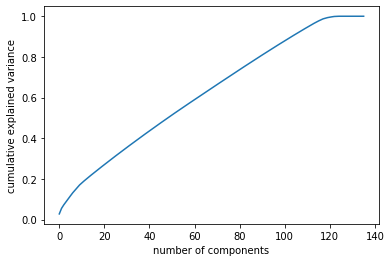

In [104]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [105]:
X_pca = pd.DataFrame(x_pca)
X_pca['STATUS']=y
columns = []
for i in range(0, len(explained_variance)):
    columns.append('PC'+str(i+1))
columns.append('STATUS')
X_pca.columns = columns
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,STATUS
0,-1.345171,2.739204,-0.118516,-0.617513,-0.593737,0.561247,-1.118240,0.471422,-1.761156,1.517118,...,8.305815e-16,-6.015465e-16,7.405867e-16,4.088003e-16,1.463834e-15,2.914304e-16,-3.785931e-18,-3.560855e-16,-3.697284e-17,1
1,4.504440,1.952104,-2.472234,0.821188,-1.627281,0.195825,1.913708,1.524088,3.694735,2.474853,...,2.190200e-16,4.740479e-16,-1.949962e-15,4.521061e-17,1.480215e-15,-1.415667e-16,4.075149e-16,8.640387e-16,-2.937007e-17,0
2,4.376256,2.710920,-2.960306,-1.364159,-1.003096,0.385654,-0.459900,0.602283,4.680560,0.434154,...,-1.918386e-16,-2.091507e-17,7.211801e-16,-1.564141e-15,1.459356e-15,-1.173372e-17,6.101128e-17,3.734092e-17,-2.058612e-17,0
3,-1.514456,-0.833589,0.979379,-1.756750,2.000073,0.811865,1.158389,-1.339610,0.080985,1.882390,...,-5.175152e-16,7.288312e-16,-3.106551e-15,4.658334e-15,-4.293983e-15,-1.943265e-16,1.515984e-15,-1.760848e-15,-2.056466e-16,1
4,2.408719,-0.140760,0.600899,-0.835958,-0.985533,0.021280,-1.120288,-0.883616,-0.573787,2.341680,...,5.712481e-15,-2.208472e-16,-2.223656e-15,-4.232801e-15,-6.221514e-17,-4.894329e-16,-2.347978e-16,2.504256e-16,7.829063e-17,0


In [106]:
target_names = np.unique(y)

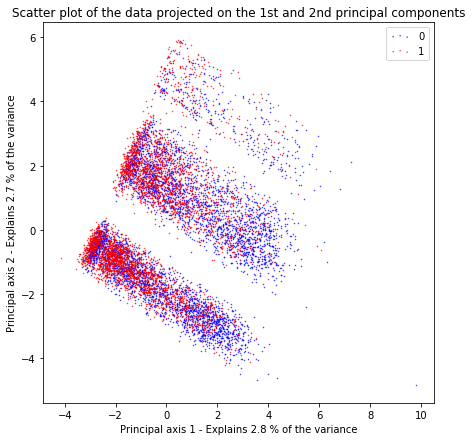

In [107]:
colors = ['blue', 'red']
plt.figure(1, figsize=(7, 7))

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x_pca[y == i, 0], x_pca[y == i, 1], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))

plt.savefig('pca.png', dpi=150)
plt.show()

In [108]:
tot = sum(pca.explained_variance_ratio_)
var_exp = [(i / tot)*100 for i in sorted(pca.explained_variance_ratio_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,len(pca.explained_variance_ratio_)+1)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,len(pca.explained_variance_ratio_)+1)], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
plotly.offline.iplot(fig)